# RCD | Comparison of HSIC and F-correlation

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

from IPython.display import display, Markdown

import warnings
warnings.filterwarnings('ignore')

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)

['1.26.1', '2.1.3', '0.20.1', '1.8.3']


## Test data
First, we generate a causal structure with 7 variables. Then we create a dataset with 5 variables from x0 to x4, with x5 and x6 being the latent variables.

In [2]:
np.random.seed(0)

get_external_effect = lambda n: np.random.normal(0.0, 0.5, n) ** 3
n_samples = 300

x5 = get_external_effect(n_samples)
x6 = get_external_effect(n_samples)
x1 = 0.6*x5 + get_external_effect(n_samples)
x3 = 0.5*x5 + get_external_effect(n_samples)
x0 = 1.0*x1 + 1.0*x3 + get_external_effect(n_samples)
x2 = 0.8*x0 - 0.6*x6 + get_external_effect(n_samples)
x4 = 1.0*x0 - 0.5*x6 + get_external_effect(n_samples)

# The latent variable x6 is not included.
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T, columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

X.head()

,x0,x1,x2,x3,x4,x5
0,-0.191493,-0.054157,0.014075,-0.047309,0.016311,0.686190
1,-0.967142,0.013890,-1.115854,-0.035899,-1.254783,0.008009
2,0.527409,-0.034960,0.426923,0.064804,0.894242,0.117195
3,1.583826,0.845653,1.265038,0.704166,1.994283,1.406609
4,0.286276,0.141120,0.116967,0.329866,0.257932,0.814202


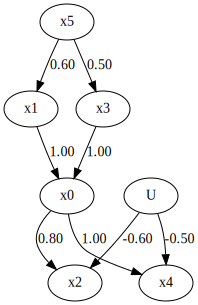

In [3]:
m = np.array([[ 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0],
              [ 0.8, 0.0, 0.0, 0.0, 0.0, 0.0,-0.6],
              [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0],
              [ 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,-0.5],
              [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
make_dot(m, labels=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'U'])

## Causal Discovery by HSIC

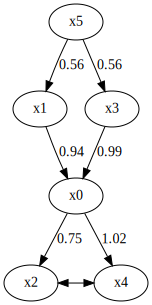

In [4]:
model = lingam.RCD()
model.fit(X)
dot = make_dot(model.adjacency_matrix_)
display(dot)

## Causal Discovery by F-correlation

### F-correlation threshold=0.7

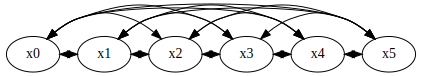

### F-correlation threshold=0.6

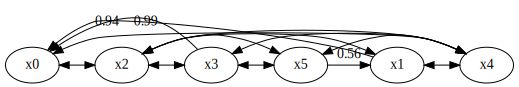

### F-correlation threshold=0.5

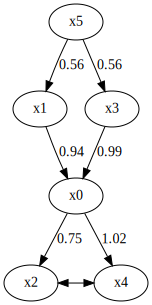

### F-correlation threshold=0.4

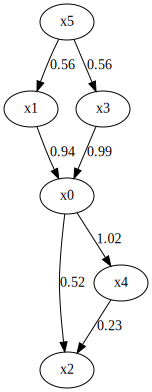

### F-correlation threshold=0.3

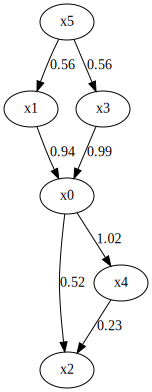

### F-correlation threshold=0.2

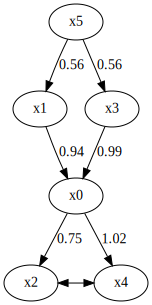

### F-correlation threshold=0.1

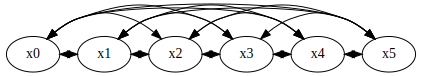

In [5]:
for ind_corr in np.linspace(0.7, 0.1, 7):
    display(Markdown(f"### F-correlation threshold={ind_corr:.1f}"))
    model = lingam.RCD(independence='fcorr', ind_corr=ind_corr)
    model.fit(X)
    dot = make_dot(model.adjacency_matrix_)
    display(dot)